In [10]:
import pandas as pd
%matplotlib inline

In [54]:
df = pd.read_csv('SampleEquityData_OMX/Trades/9302.csv', parse_dates=[['Date', 'Time']], index_col='Date_Time')

In [33]:
df.head()

,Symbol,Price,Volume,Sales Condition,Exclude Record Flag,Filtered Price,Seller,Buyer
Date_Time,,,,,,,,
2014-03-03 09:00:02.179,PREC,1.53,500,1,NaN,NaN,AVA,ENS
2014-03-03 09:00:02.179,PREC,1.53,1000,1,NaN,NaN,AVA,SWB
2014-03-03 09:00:02.179,PREC,1.53,1500,1,NaN,NaN,AVA,NDS
2014-03-03 09:00:02.179,PREC,1.53,3500,1,NaN,NaN,AVA,NDS
2014-03-03 09:00:02.179,PREC,1.53,1000,1,NaN,NaN,AVA,NDS


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11627d3c8>,
      dtype=object)

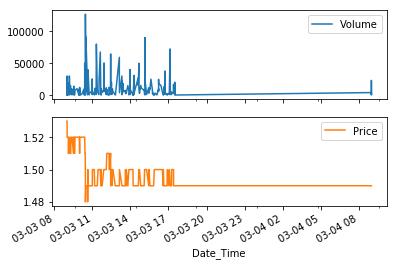

In [46]:
df[['Volume', 'Price']].first('D').plot(subplots=True)

In [76]:
# I could sample as a function of free-floating market capitalization
# Right now im just using 20000
o = 0
h = 0
l = 999999
c = 0
v = 0
turnover = 0
sample_amount = 40000
X = pd.DataFrame(columns=['open','high','low','close','volume','turnover'], index=pd.to_datetime([]))
for day_index, day in df.groupby(pd.Grouper(freq='D')):
    for index, row in day.iterrows():
        o = row['Price'] if o == 0 else o # if this is the first bar this is the open
        l = row['Price'] if row['Price'] < l else l
        h = row['Price'] if row['Price'] > h else h
        v += row['Volume']
        turnover += row['Volume'] * row['Price']
        if turnover >= sample_amount:
            c = row['Price'] # This is the last bar
            X.loc[index] = pd.Series([o, h, l, c, v, turnover], ['open', 'high', 'low', 'close', 'volume', 'turnover'])
            l = 99999
            o = h = c = v = turnover = 0

In [84]:
def getTEvents(gRaw,h):
    # Todo i should use iterrows instead
    # How to plot events in chart
    tEvents, sPos, sNeg = [], 0, 0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos, sNeg = max(0, sPos+diff.loc[i]), min(0,sNeg+diff.loc[i])
        if sNeg < -h:
            sNeg = 0; tEvents.append(i)
        elif sPos > h:
            sPos =0; tEvents.append(i)
    return pd.DatetimeIndex(tEvents)

TypeError: <class 'NoneType'> type object None

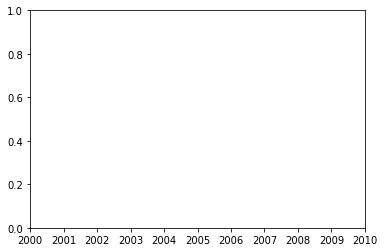

In [90]:
events = getTEvents(X['volume'], 2)
X['close'].plot(linestyle='-', markevery=events, marker='o', markerfacecolor='r');

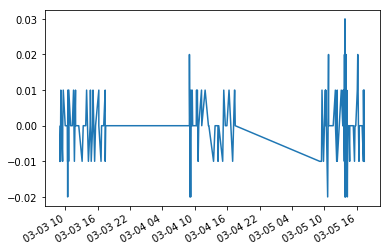

In [93]:
X['close'].diff().plot()

I could sample as a function of free-floating market capitalization

Lopez de Prado, Marcos. Advances in Financial Machine Learning (Kindle Location 1420). Wiley. Kindle Edition. 